In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load data from file
file_path = "./retail_food_waste.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the data
data.head(20)

,Region,M49 code,Country,Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Confidence in estimate
0,Australia and New Zealand,36,Australia,9,"238,248",High Confidence
1,Australia and New Zealand,554,New Zealand,3,"14,923",High Confidence
2,Central Asia,398,Kazakhstan,16,"290,148",Very Low Confidence
3,Central Asia,417,Kyrgyzstan,16,"100,346",Very Low Confidence
4,Central Asia,762,Tajikistan,16,"145,783",Very Low Confidence
5,Central Asia,795,Turkmenistan,16,"92,936",Very Low Confidence
6,Central Asia,860,Uzbekistan,16,"515,841",Very Low Confidence
7,Eastern Asia,156,China,16,"22,424,705",Very Low Confidence
8,Eastern Asia,344,"China, Hong Kong SAR",13,"95,267",Low Confidence
9,Eastern Asia,446,"China, Macao SAR",13,"8,204",Low Confidence


In [4]:

# Check the data type of the column
print(data['Retail estimate (tonnes/year)'].dtype)

object


In [6]:
# Remove commas from the values in 'Retail estimate (tonnes/year)' column and convert to numeric
data['Retail estimate (tonnes/year)'] = pd.to_numeric(data['Retail estimate (tonnes/year)'].apply(lambda x: re.sub(r',', '', str(x))), errors='coerce').fillna(0)


In [8]:
# Display the first few rows of the 'Retail estimate (tonnes/year)' column
print(data['Retail estimate (tonnes/year)'].head())

0    238248
1     14923
2    290148
3    100346
4    145783
Name: Retail estimate (tonnes/year), dtype: int64


In [10]:
# Group data by 'Region' and calculate statistical summaries
region_statistics = data.groupby('Region').agg({
    'Retail estimate (tonnes/year)': ['mean', 'median', 'sum', 'std']
}).reset_index()

print(region_statistics)


                             Region Retail estimate (tonnes/year)            \
                                                             mean    median   
0         Australia and New Zealand                  1.265855e+05  126585.5   
1                      Central Asia                  2.290108e+05  145783.0   
2                      Eastern Asia                  3.533088e+06  401425.0   
3                    Eastern Europe                  4.074097e+05  142390.5   
4   Latin America and the Caribbean                  2.387498e+05   40965.0   
5                         Melanesia                  3.399400e+04   10476.0   
6                        Micronesia                  1.112000e+03     920.0   
7                   Northern Africa                  6.287330e+05  620017.5   
8                  Northern America                  1.408031e+06  240042.5   
9                   Northern Europe                  6.963192e+04   48952.5   
10                        Polynesia                 

In [12]:
# Check the data type of the 'Retail estimate (kg/capita/year)' column
print(data['Retail estimate (kg/capita/year)'].dtype)

int64


In [14]:
# Convert the "Retail estimate (kg/capita/year)" column to numeric format, ignoring errors
data['Retail estimate (kg/capita/year)'] = pd.to_numeric(data['Retail estimate (kg/capita/year)'], errors='coerce')

In [16]:
# Group data by 'Region' and calculate statistical summaries for 'Retail estimate (kg/capita/year)'
region_statistics_kg_per_capita = data.groupby('Region').agg({
    'Retail estimate (kg/capita/year)': ['mean', 'median', 'sum', 'std']
}).reset_index()

print(region_statistics_kg_per_capita)

                             Region Retail estimate (kg/capita/year)         \
                                                                mean median   
0         Australia and New Zealand                         6.000000    6.0   
1                      Central Asia                        16.000000   16.0   
2                      Eastern Asia                        13.714286   13.0   
3                    Eastern Europe                        14.300000   13.5   
4   Latin America and the Caribbean                        14.785714   16.0   
5                         Melanesia                        15.400000   16.0   
6                        Micronesia                        14.285714   13.0   
7                   Northern Africa                        16.000000   16.0   
8                  Northern America                        13.750000   13.0   
9                   Northern Europe                        12.833333   13.0   
10                        Polynesia                 

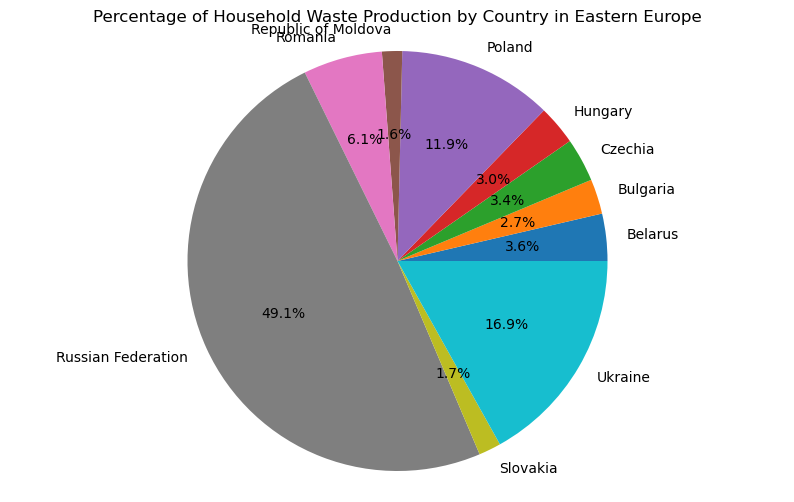

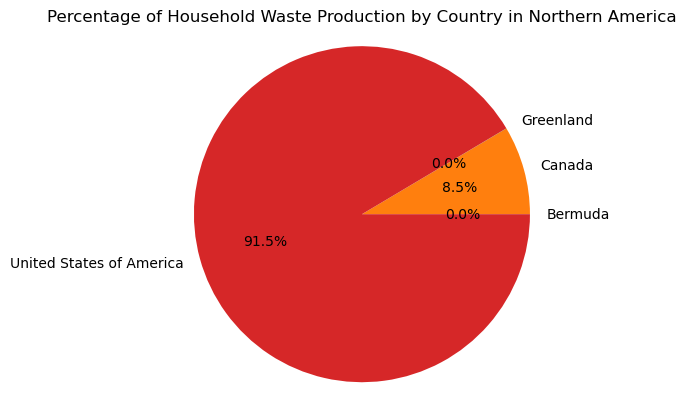

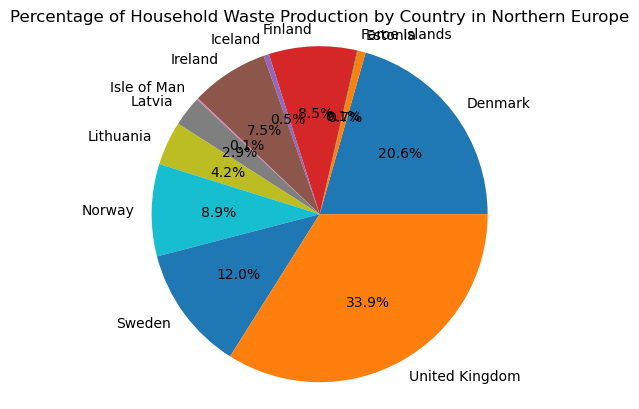

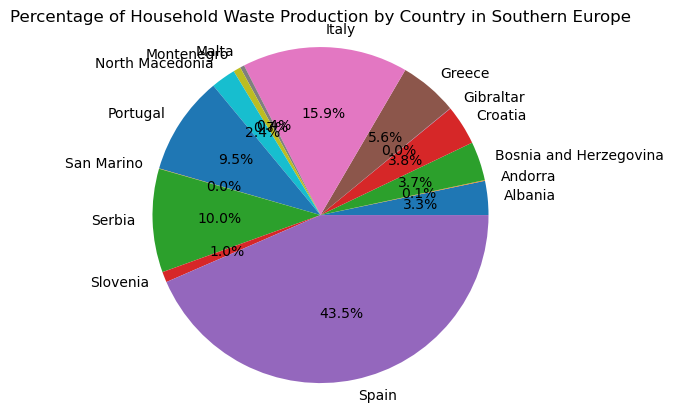

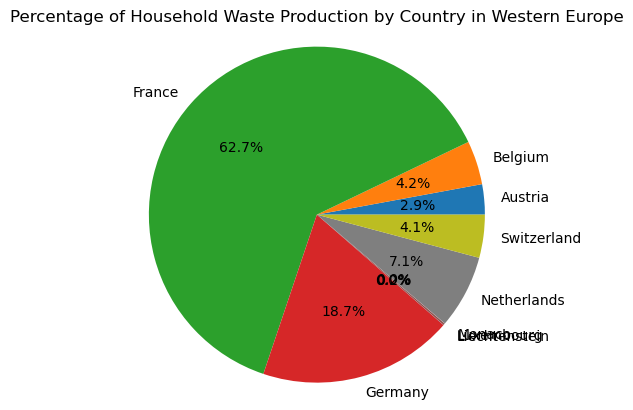

In [18]:
# Group the data by regions and countries and calculate the total amount of waste production for each country within the region
region_country_grouped = data.groupby(['Region', 'Country'])['Retail estimate (tonnes/year)'].sum().reset_index()

# Calculate the percentage of waste production by each country within the region
region_country_grouped['Percentage'] = region_country_grouped.groupby('Region')['Retail estimate (tonnes/year)'].transform(lambda x: (x / x.sum()) * 100)

# Filtering data to select specific regions
selected_regions = ['Northern America', 'Northern Europe', 'Southern Europe', 'Western Europe', 'Eastern Europe']  # Replace this with the actual names of the regions you need
filtered_data = region_country_grouped[region_country_grouped['Region'].isin(selected_regions)]

# Plotting charts for selected regions
plt.figure(figsize=(10, 6))
for region, region_data in filtered_data.groupby('Region'):
    plt.pie(region_data['Percentage'], labels=region_data['Country'], autopct='%1.1f%%')
    plt.title(f'Percentage of Household Waste Production by Country in {region}')
    plt.axis('equal')  # Ensuring a circular format for the pie chart
    plt.show()

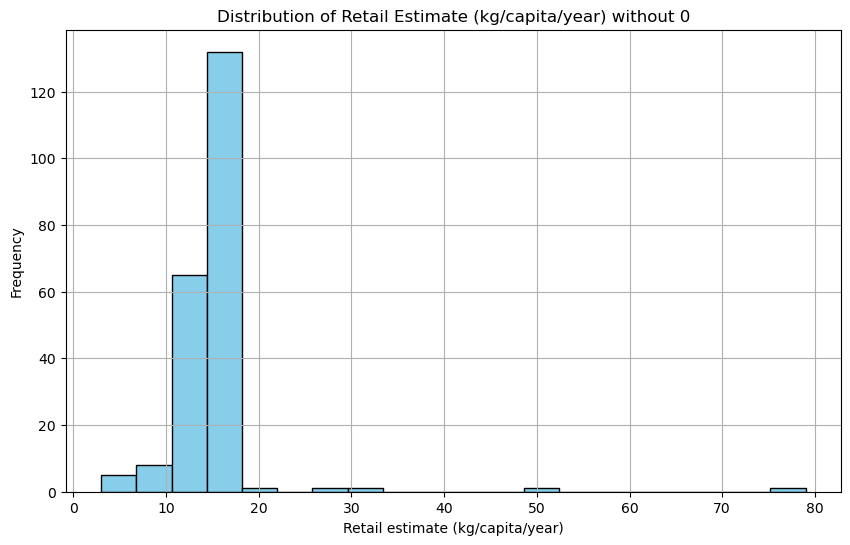

In [20]:
# Filter out values equal to 0
non_zero_values = data[data['Retail estimate (kg/capita/year)'] != 0]['Retail estimate (kg/capita/year)']

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(non_zero_values, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Retail Estimate (kg/capita/year) without 0')
plt.xlabel('Retail estimate (kg/capita/year)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()